In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Identifiability plots

Produce plots showing that neural networks are non-identifiable a la Roy et al. 2024

Consider the one neuron wide, one layer deep network
$$\alpha_2 \textrm{ReLU}(\alpha_1 x + \beta_1) + \beta_2$$
This network in not identifiable. Example 1: Fix $\beta_1$ and $\beta_2$. For each value of $\alpha_1$, there exists a value of $\alpha_2$ that preserves the function.
$$\alpha_2 := \frac{1}{\alpha_1}$$

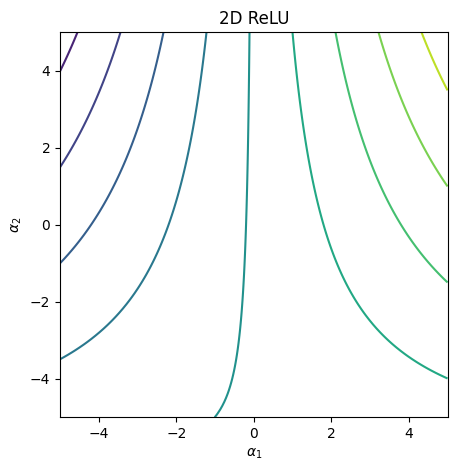

In [27]:
test_X = jnp.linspace(-1, 1, 1000)
def f(alpha1, alpha2, x = test_X):
    return alpha2 * jax.nn.relu(alpha1 * x + 5) + 1


A1, A2 = jnp.linspace(-5, 5, 100), jnp.linspace(-5, 5, 100)
data = []
for i in range(len(A1)):
    row = []
    for j in range(len(A2)):
        row += [f(A1[i], A2[j])[-100]]
    data += [row]
Z = jnp.array(data)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title("2D ReLU")
ax.set_xlabel("$\\alpha_1$")
ax.set_ylabel("$\\alpha_2$")

isos = ax.contour(A1, A2, Z, levels=10)
plt.show()